In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style 
plt.style.use('seaborn-v0_8-deep')
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from datetime import datetime

#Get the data
df = pd.read_csv("train.csv")

In [2]:
#inspect the data
df.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,...,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,target,id
0,F,50.0,20/05/98,29.200000,2.0,Play 100,BS210,62.0,153.000000,185.0,...,OK,0.150531,0.246536,0.706735,0.046729,0.203034,F,F,0,K262360
1,M,25.0,16/12/96,46.533333,1.0,CAT 100,ASAD90,146.0,718.800000,98.0,...,OK,0.188988,0.780710,0.178886,0.040404,0.273249,F,F,1,K170160
2,F,46.0,27/08/97,38.066667,1.0,CAT 50,WC95,160.0,322.800000,7.0,...,OK,0.239300,0.722633,0.277367,0.000000,0.205025,F,F,0,K331610
3,F,59.0,13/07/98,27.400000,1.0,CAT 50,BS110,84.0,317.400001,57.0,...,OK,0.221467,0.662492,0.337508,0.000000,0.050090,F,F,0,K332460
4,F,25.0,08/01/99,21.433333,1.0,Play 300,WC95,14.0,309.600000,326.0,...,OK,0.107509,0.321896,0.663132,0.014972,0.090509,F,F,0,K394220


In [3]:
#Note that dropped_call_ratio, usage_band, call_cost_per_min have some missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  5044 non-null   object 
 1   Age                     5044 non-null   float64
 2   Connect_Date            5044 non-null   object 
 3   L_O_S                   5044 non-null   float64
 4   Dropped_Calls           5044 non-null   float64
 5   tariff                  5044 non-null   object 
 6   Handset                 5044 non-null   object 
 7   Peak_calls_Sum          5044 non-null   float64
 8   Peak_mins_Sum           5044 non-null   float64
 9   OffPeak_calls_Sum       5044 non-null   float64
 10  OffPeak_mins_Sum        5044 non-null   float64
 11  Weekend_calls_Sum       5044 non-null   float64
 12  Weekend_mins_Sum        5044 non-null   float64
 13  International_mins_Sum  5044 non-null   float64
 14  Nat_call_cost_Sum       5044 non-null   

In [17]:
#We can drop the column id: it is unique to each customer and has no predictive value
df.drop(["id"], axis=1, inplace=True)
print(df.columns)

Index(['Gender', 'Age', 'Connect_Date', 'L_O_S', 'Dropped_Calls', 'tariff',
       'Handset', 'Peak_calls_Sum', 'Peak_mins_Sum', 'OffPeak_calls_Sum',
       'OffPeak_mins_Sum', 'Weekend_calls_Sum', 'Weekend_mins_Sum',
       'International_mins_Sum', 'Nat_call_cost_Sum', 'AvePeak', 'AveOffPeak',
       'AveWeekend', 'National_calls', 'National mins', 'AveNational',
       'All_calls_mins', 'Dropped_calls_ratio', 'Usage_Band', 'Mins_charge',
       'call_cost_per_min', 'actual call cost', 'Total_call_cost',
       'Total_Cost', 'Tariff_OK', 'average cost min', 'Peak ratio',
       'OffPeak ratio', 'Weekend ratio', 'Nat-InterNat Ratio',
       'high Dropped calls', 'No Usage', 'target'],
      dtype='object')


In [27]:
#Create lists of the attributes that are continuous and categorical
categorical = ["Gender", "Connect_Date", "tariff", "Handset", "Usage_Band", "Tariff_OK", "high Dropped calls", "No Usage", "target"]

continuous = ['Age', 'L_O_S', 'Dropped_Calls', 'Peak_calls_Sum', 'Peak_mins_Sum',  'OffPeak_calls_Sum', 'OffPeak_mins_Sum', 'Weekend_calls_Sum',
             'Weekend_mins_Sum', 'International_mins_Sum', 'Nat_call_cost_Sum','AvePeak', 'AveOffPeak', 'AveWeekend', 'National_calls', 'National mins',
             'AveNational', 'All_calls_mins', 'Dropped_calls_ratio', 'Mins_charge', 'call_cost_per_min', 'actual call cost', 'Total_call_cost', 
             'Total_Cost', 'average cost min','Peak ratio', 'OffPeak ratio', 'Weekend ratio', 'Nat-InterNat Ratio']

#Look for missing values and 
for col  in categorical:
    print(df[col].value_counts())

Gender
F    2597
M    2447
Name: count, dtype: int64
Connect_Date
11/07/99    12
14/02/99    11
23/07/99    11
18/10/99    10
10/11/96    10
            ..
03/08/97     1
09/02/98     1
18/09/97     1
19/12/99     1
16/08/98     1
Name: count, Length: 1349, dtype: int64
tariff
CAT 200     2246
CAT 100     1047
Play 100     788
Play 300     648
CAT 50       315
Name: count, dtype: int64
Handset
S50        1175
BS110       854
S80         741
WC95        686
ASAD170     665
BS210       283
ASAD90      270
CAS30       180
CAS60       106
SOP20        48
SOP10        36
Name: count, dtype: int64
Usage_Band
Med        2779
MedHigh    1270
MedLow      547
High        360
Low          84
Name: count, dtype: int64
Tariff_OK
OK               5001
High CAT 100       28
High CAT 50         9
High Play 100       6
Name: count, dtype: int64
high Dropped calls
F    4915
T     129
Name: count, dtype: int64
No Usage
F    5040
T       4
Name: count, dtype: int64
target
0    4299
1     745
Name: count, 

In [5]:
#summary statistcs 
df.describe()

,Age,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,...,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,target
count,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,...,5040.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000
mean,31.384417,33.626890,2.677042,239.154441,708.610393,104.080293,312.420299,16.487510,50.139360,170.310248,...,10.092345,19.289973,73.909497,187.082344,0.168484,0.609938,0.327813,0.061456,0.162820,0.147700
std,12.767989,14.041931,3.427875,239.627055,503.964199,97.868704,199.094991,16.379353,36.051349,142.238289,...,2.105534,28.161217,60.377401,82.471189,0.078024,0.223795,0.209852,0.063664,0.104220,0.354838
min,12.000000,9.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,59.940000,0.048998,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,21.266667,0.000000,59.000000,307.800001,28.000000,147.525000,4.000000,22.800000,65.511122,...,8.578771,0.000000,32.306809,123.926851,0.134453,0.467401,0.165634,0.021097,0.079444,0.000000
50%,29.000000,33.583334,1.000000,161.000000,611.699999,73.000000,293.699999,12.000000,44.400000,132.281821,...,9.513941,7.800333,58.122962,173.505141,0.154474,0.655549,0.286238,0.043909,0.158947,0.000000
75%,39.000000,45.866667,2.000000,343.000000,1015.950000,156.000000,447.000000,24.000000,72.000000,236.113750,...,11.749149,28.747465,99.011752,232.132750,0.179141,0.782501,0.459535,0.080634,0.244624,0.000000
max,80.000000,58.200000,15.000000,1626.000000,2901.600001,560.000000,1091.099999,124.000000,205.000000,977.723297,...,21.734694,190.464194,463.233885,613.233885,1.357564,1.000000,1.000000,0.797546,2.601223,1.000000


<h4> Age ranges from 12 to 80 with a median of 29. 

<h4>Creating a Test and Training Set</h4>

In [2]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=123)
print("Training set has size " + str(len(train_set)) + ", and test set has size " + str(len(test_set)))

Training set has size 4035, and test set has size 1009


<h4> Target Variabel: Churn

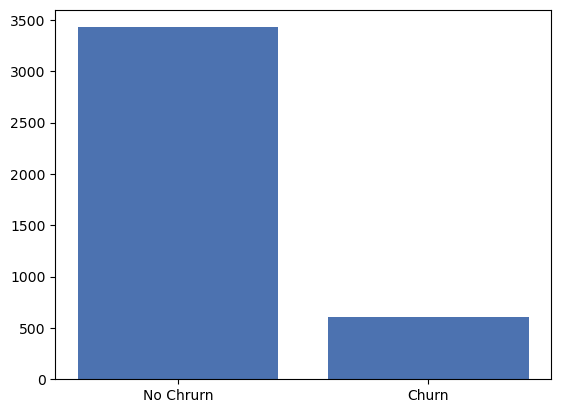

In [55]:
plt.hist(train_set["target"],
         bins=2,
         rwidth=0.8)
plt.xticks([0.25,0.75], ["No Chrurn", "Churn"])
plt.show()

<h4>Continuous Variables</h4>

<h4> Convert date to a continuous time variable days since connected


In [272]:
print(train_set["Connect_Date"])
date_col = pd.to_datetime(train_set["Connect_Date"], format = '%d/%m/%y')


43      01/07/97
1079    02/05/99
1993    06/07/98
2497    14/03/97
2892    27/01/98
          ...   
1593    27/01/99
4060    19/05/97
1346    31/08/98
3454    07/01/98
3582    19/06/97
Name: Connect_Date, Length: 4035, dtype: object


43     1997-07-01
1079   1999-05-02
1993   1998-07-06
2497   1997-03-14
2892   1998-01-27
          ...    
1593   1999-01-27
4060   1997-05-19
1346   1998-08-31
3454   1998-01-07
3582   1997-06-19
Name: Connect_Date, Length: 4035, dtype: datetime64[ns]

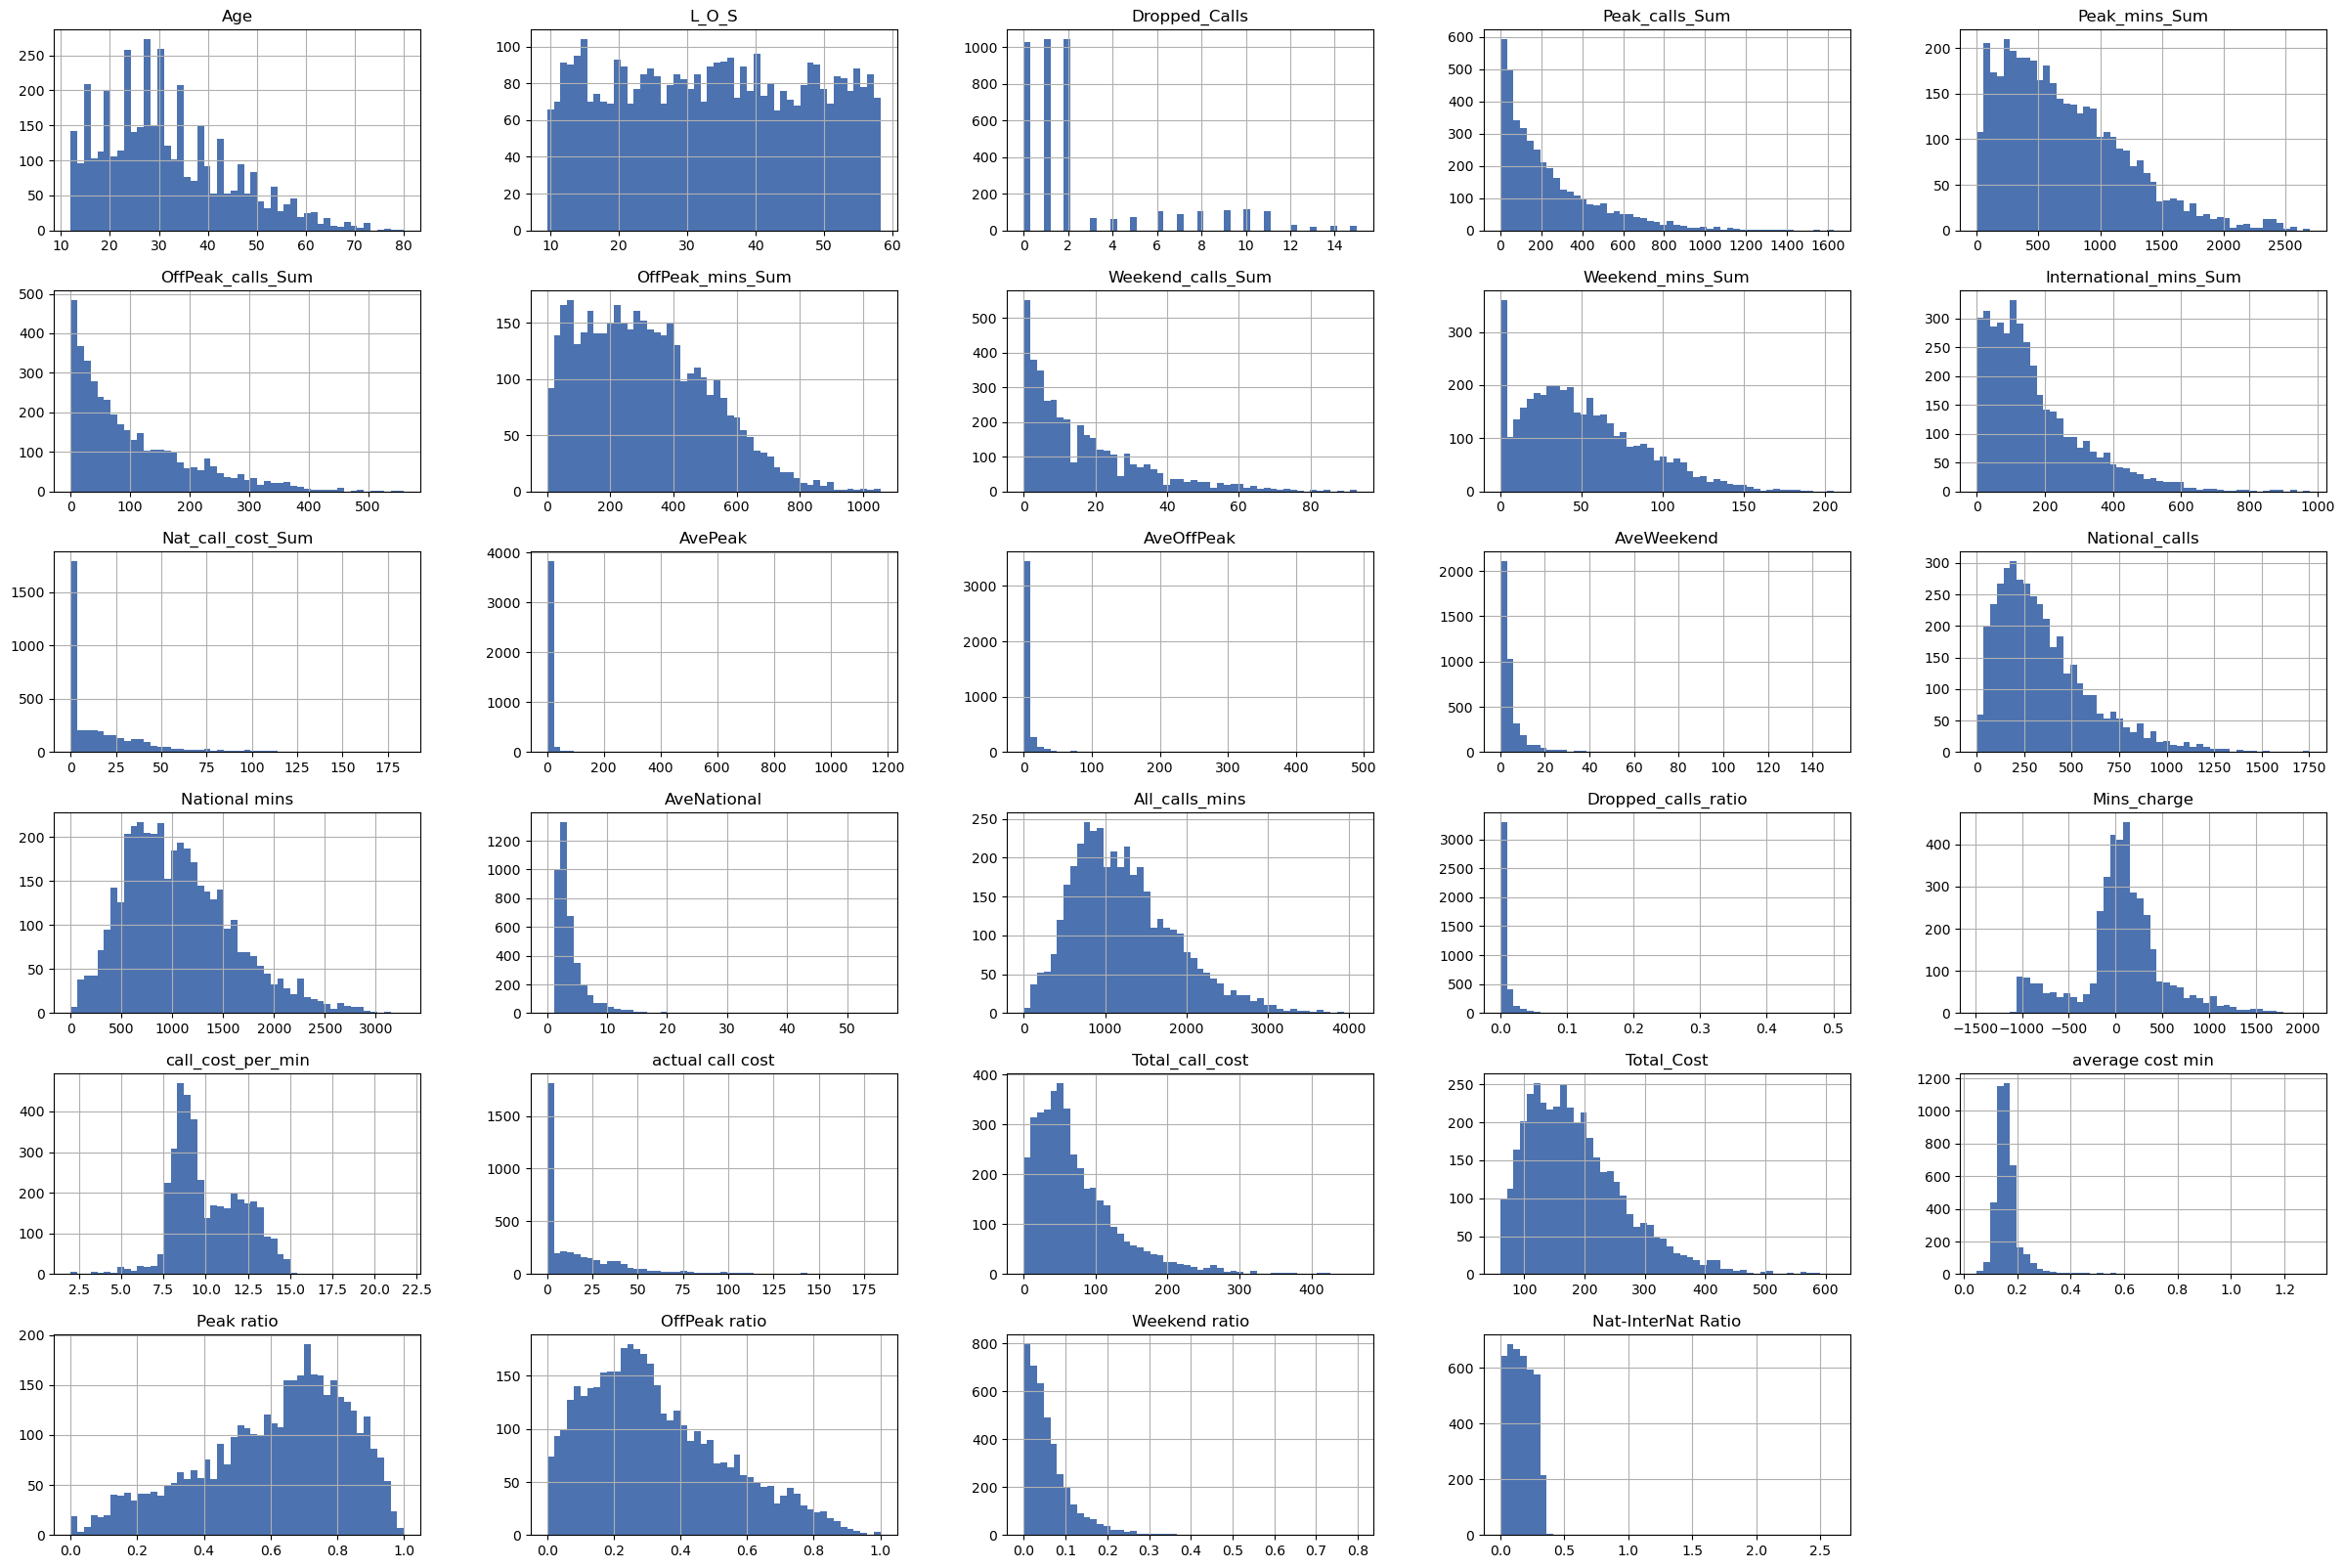

In [69]:
train_set[continuous].hist(bins=50, figsize=(30,20))
plt.show()

<h4> Let's take a look at some of these in more detail

<h4> Function to plot distributions of each variable

In [177]:
#Function to plot distributions of different variables
colors = ['#DD403A','#00A5E0']
ch=train_set.loc[train_set["target"]==1,]
noch=train_set.loc[train_set["target"]==0,]
def plot_continuous(feature):
    '''Plot a histogram and boxplot for the churned and retained distributions for the specified feature.'''
    df_func = train_set.copy()
    df_func['target'] = df_func['target'].astype('category')

    fig, (ax1, ax2) = plt.subplots(2,
                                   figsize=(9, 7),
                                   sharex=True,
                                   gridspec_kw={'height_ratios': (.7, .3)})

    for df, color, label in zip([ch, noch], colors, ['Churned', 'Retained']):
        sns.histplot(data=df,
                     x=feature,
                     bins=15,
                     color=color,
                     alpha=0.66,
                     edgecolor='firebrick',
                     label=label,
                     kde=False,
                     ax=ax1)
    ax1.legend()

    sns.boxplot(x=feature, y='target', data=df_func, palette=colors, ax=ax2)
    ax2.set_ylabel('')
    ax2.set_yticklabels(['Churned', 'Retained'])

    plt.tight_layout()

C:\Users\rdequ\AppData\Local\Temp\ipykernel_18896\443878774.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(2,


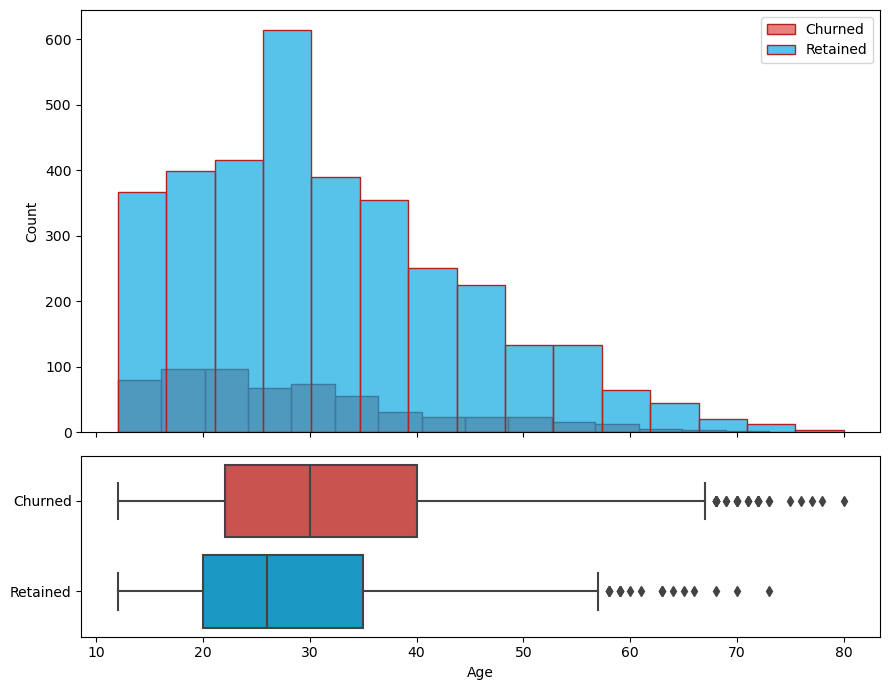

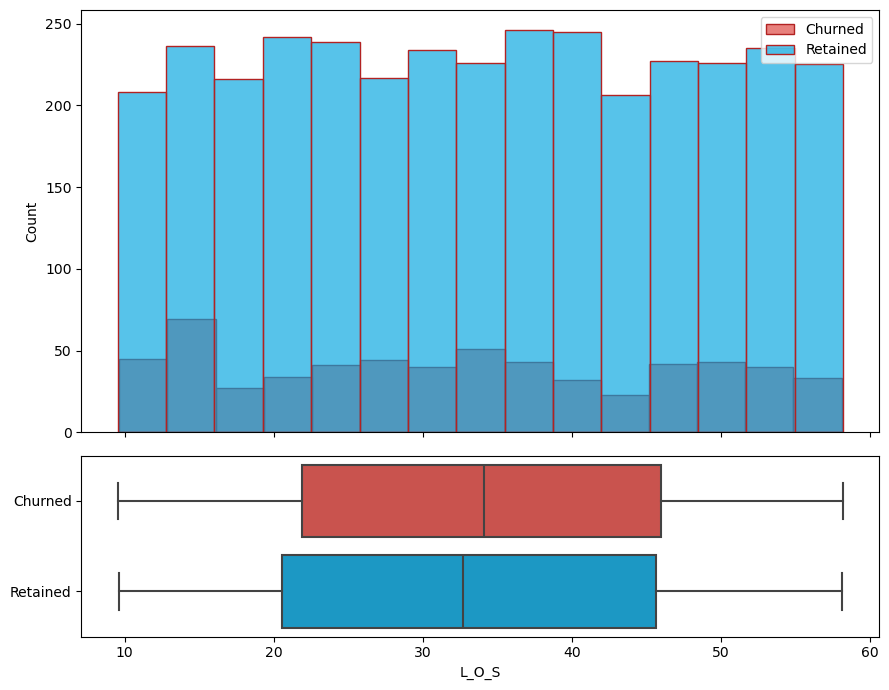

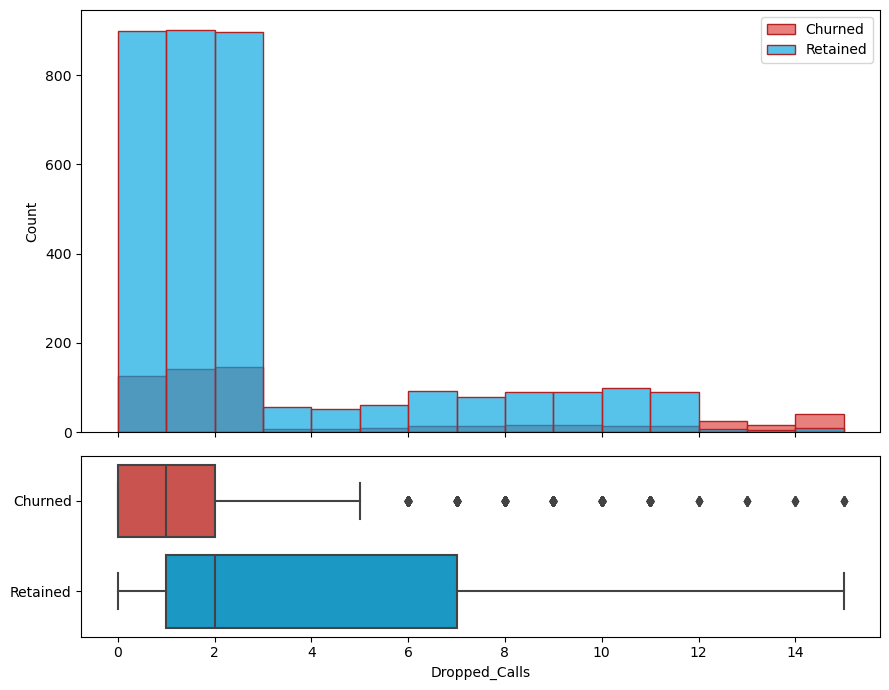

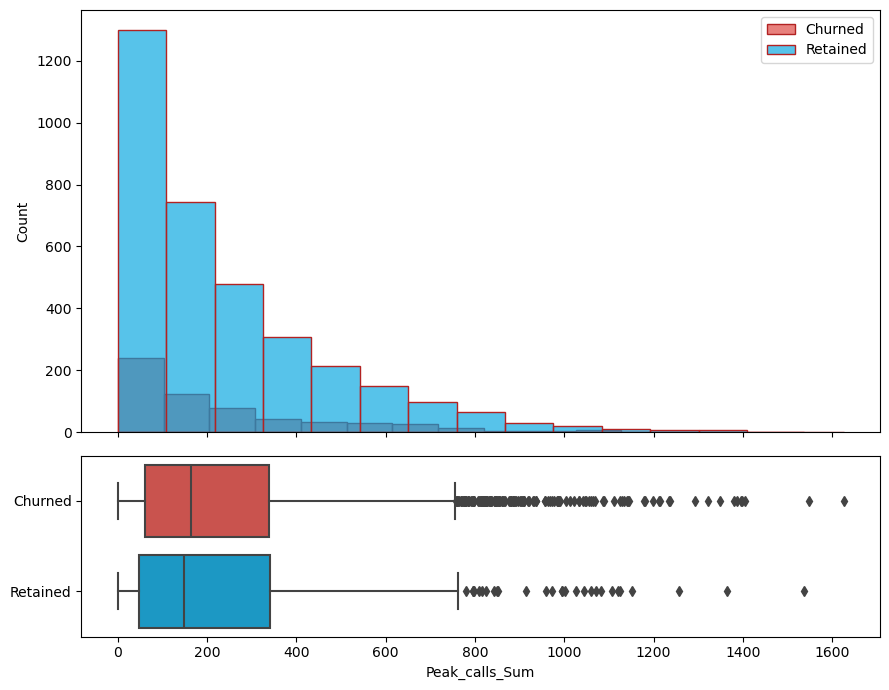

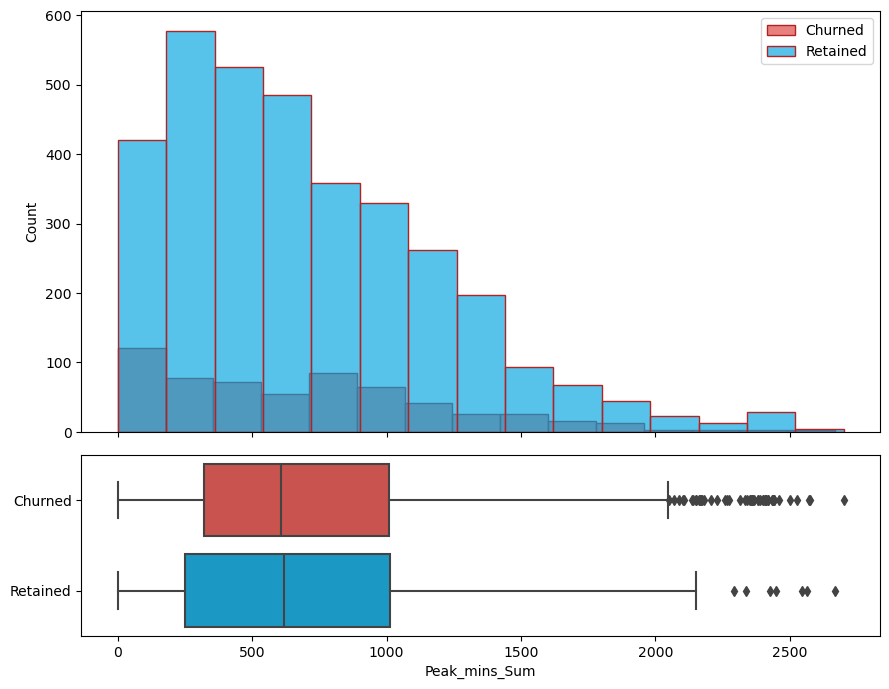

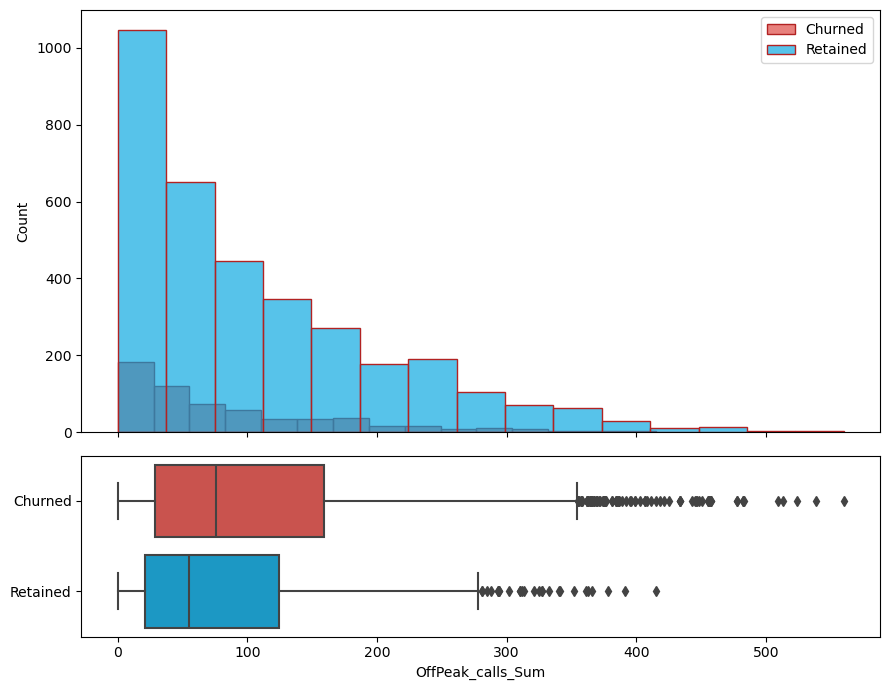

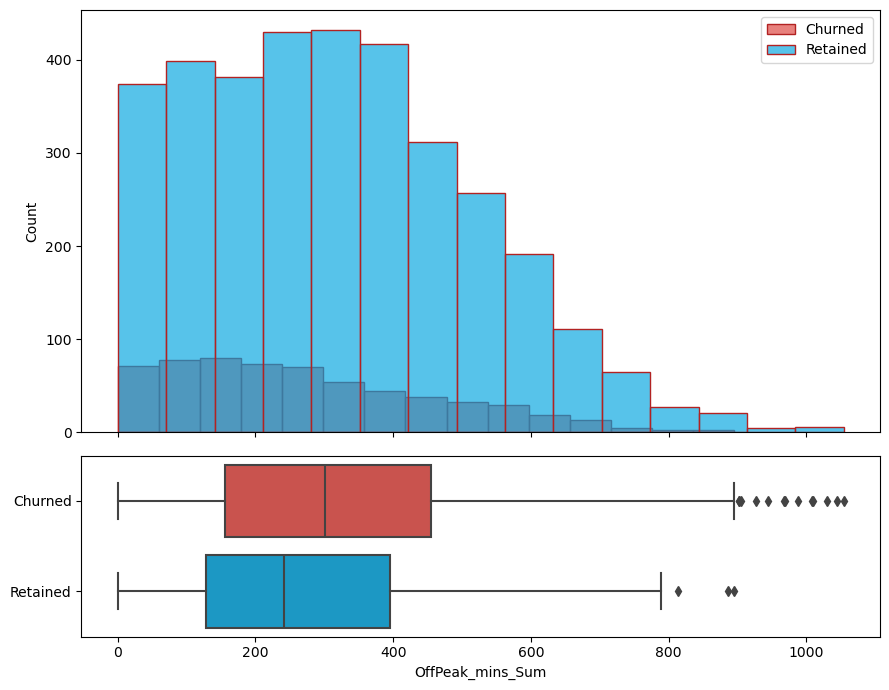

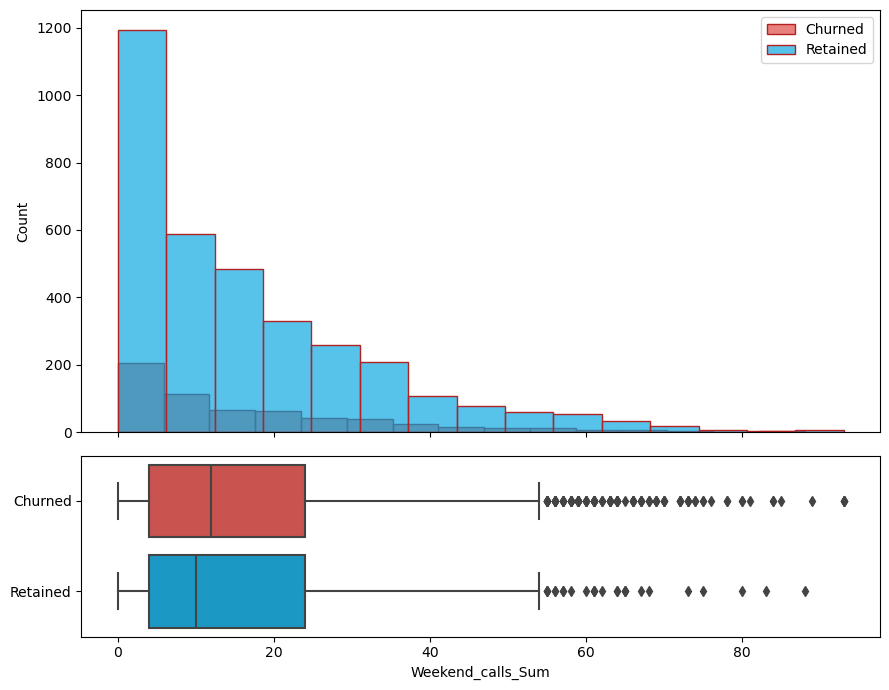

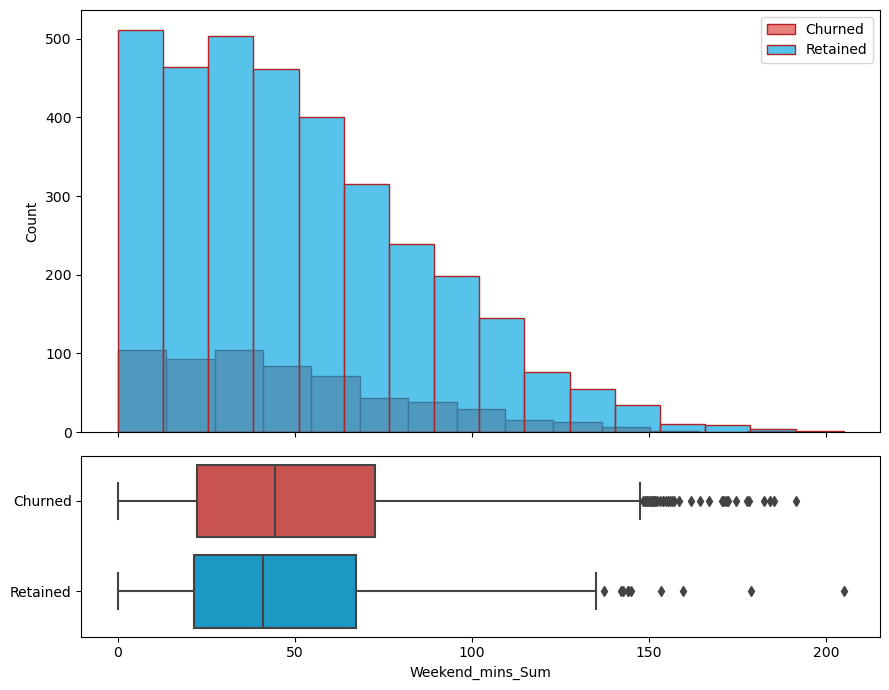

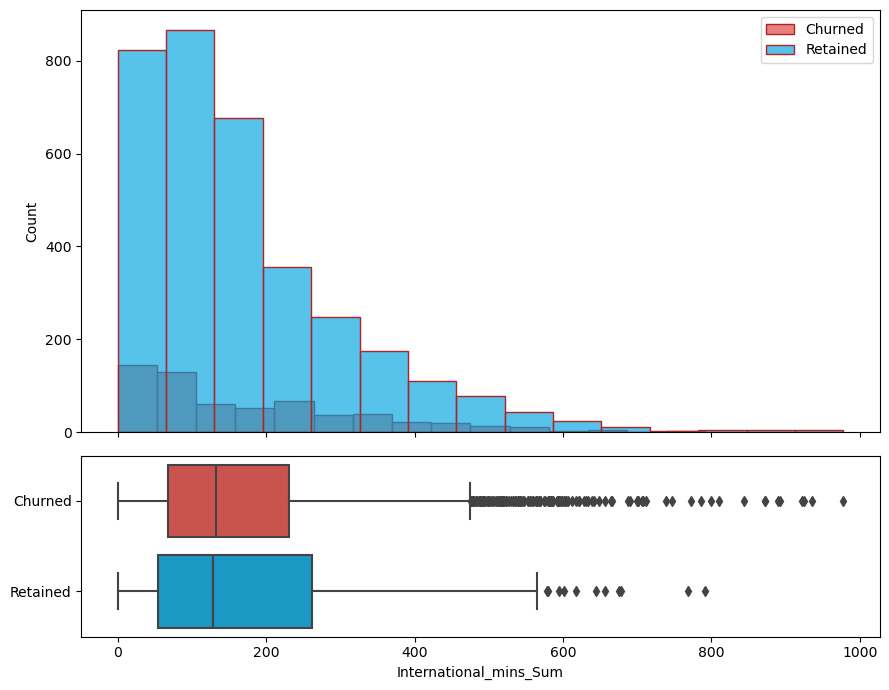

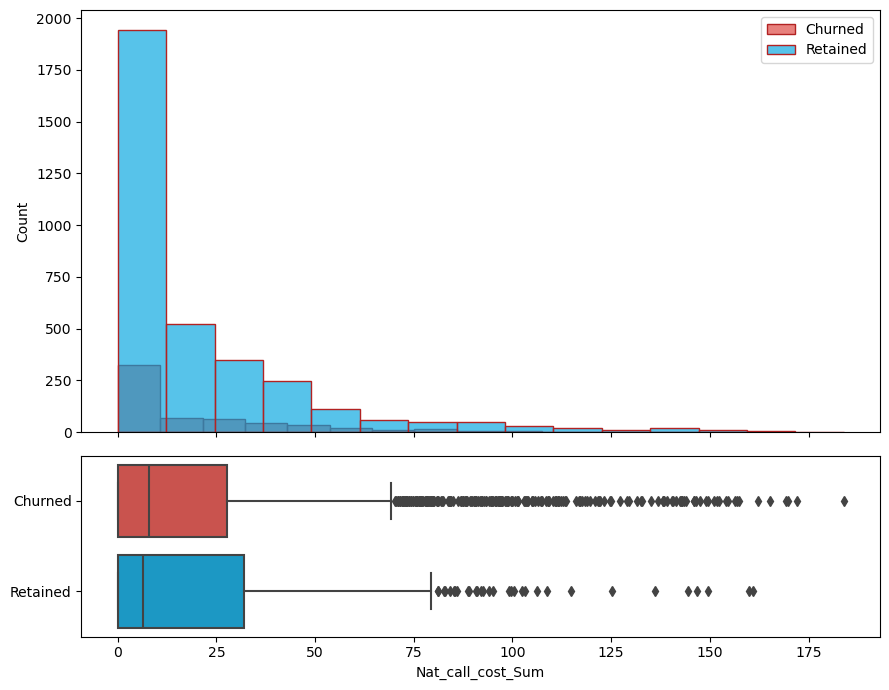

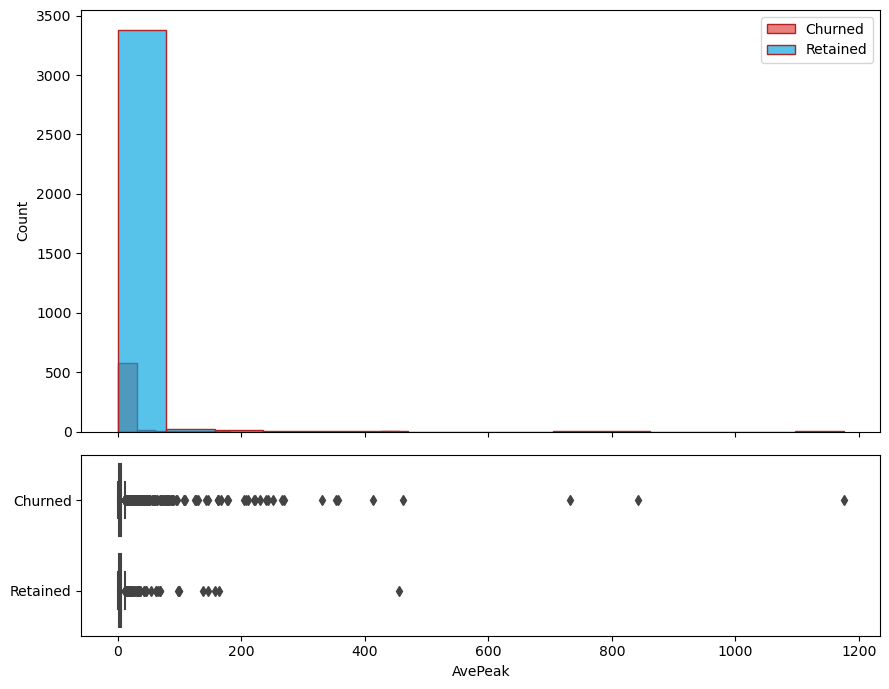

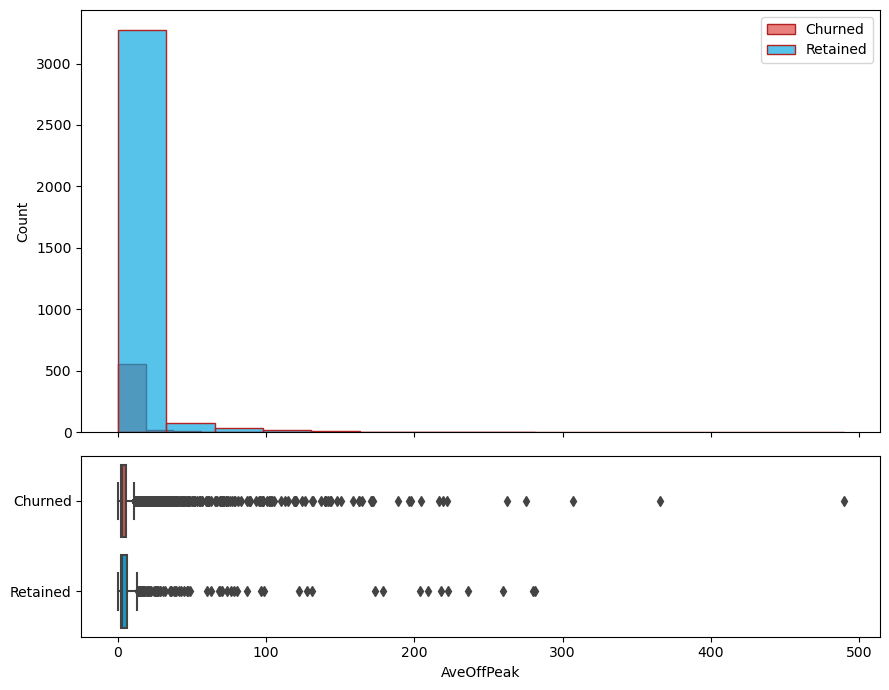

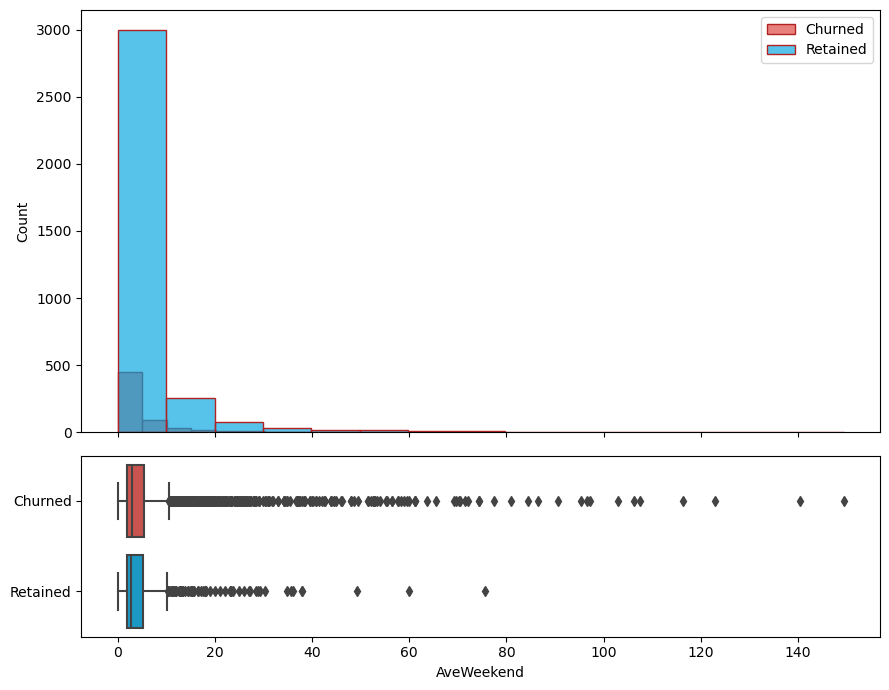

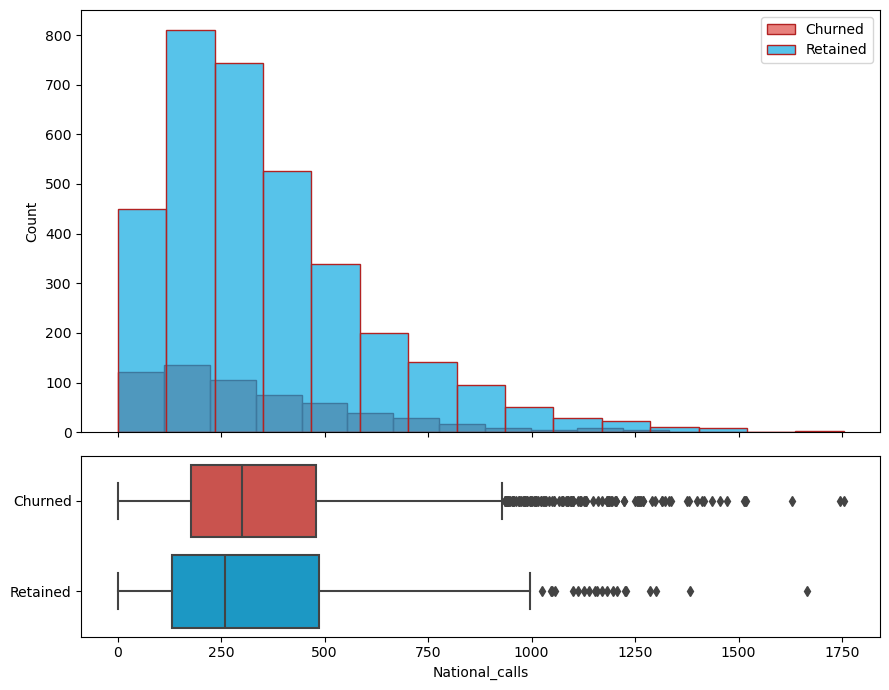

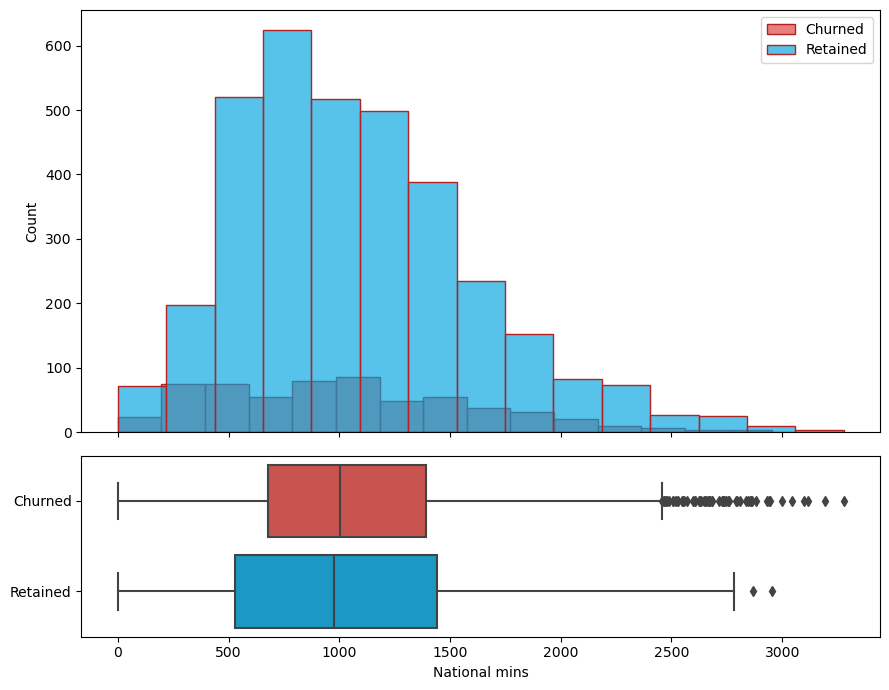

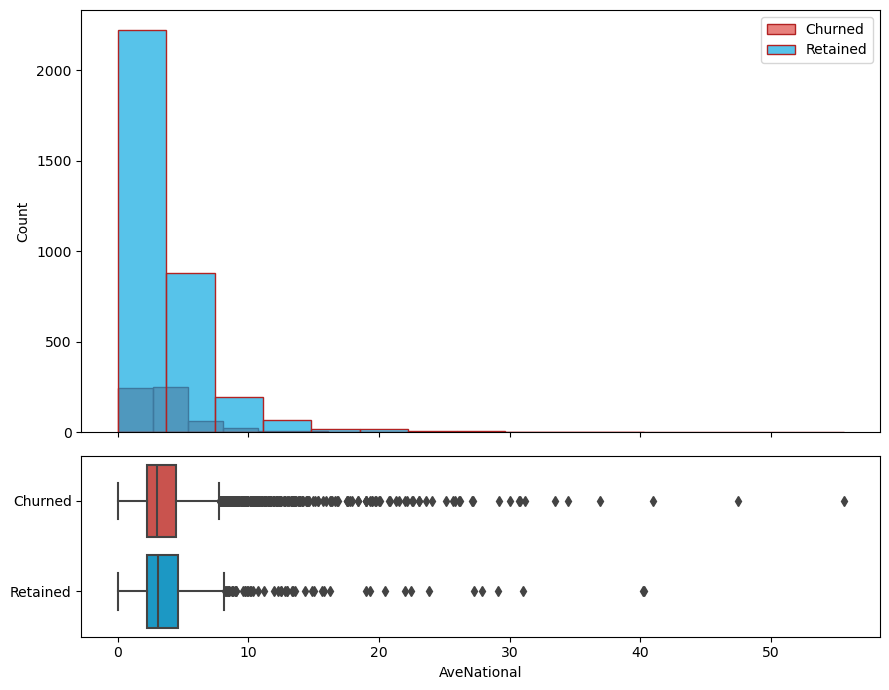

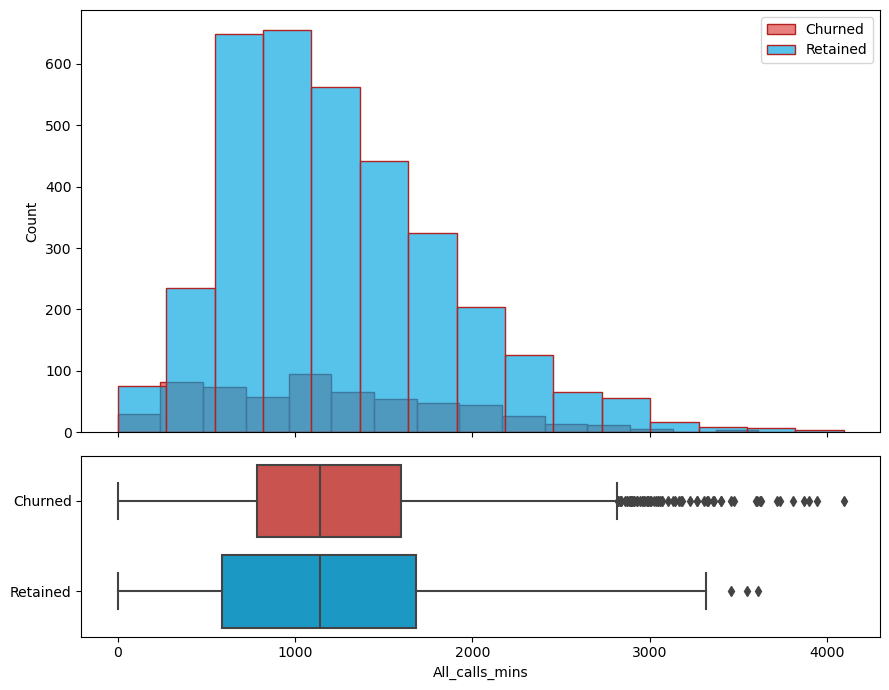

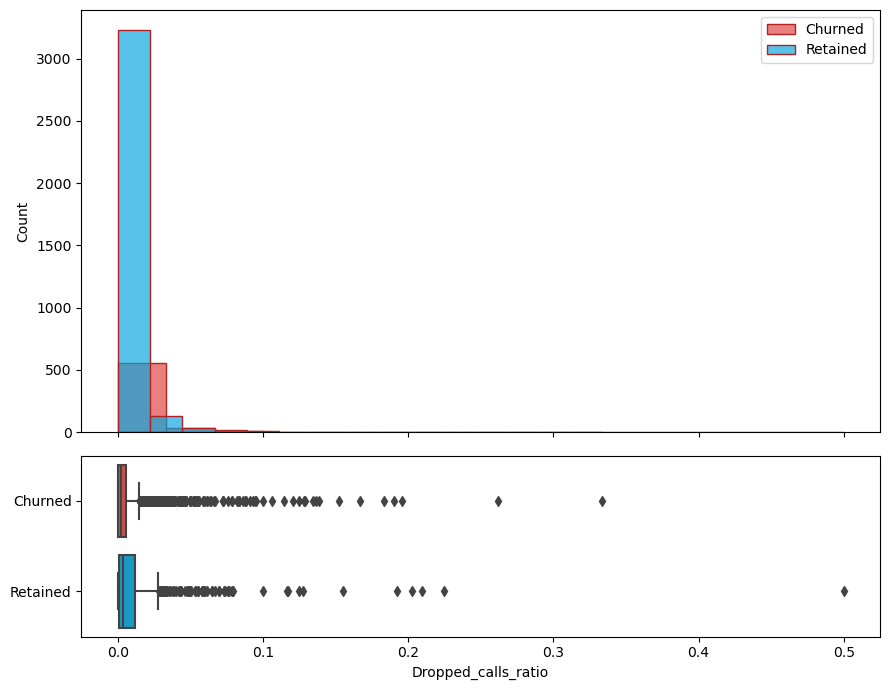

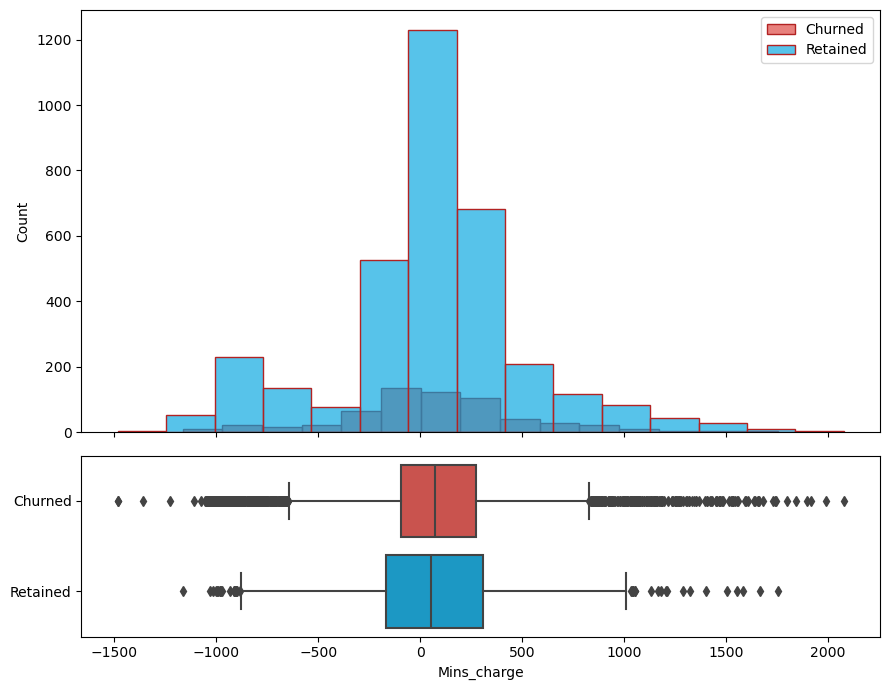

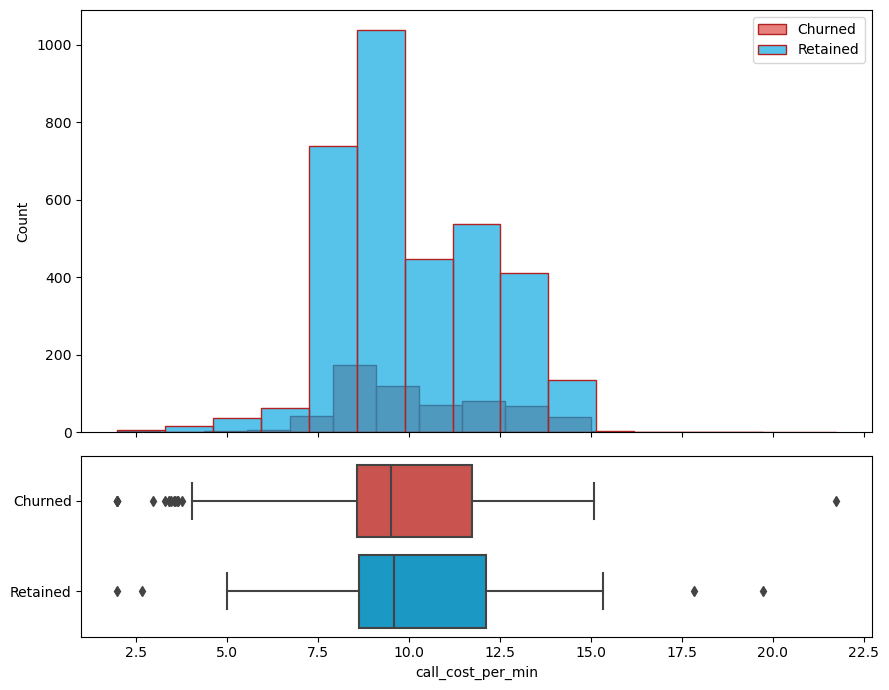

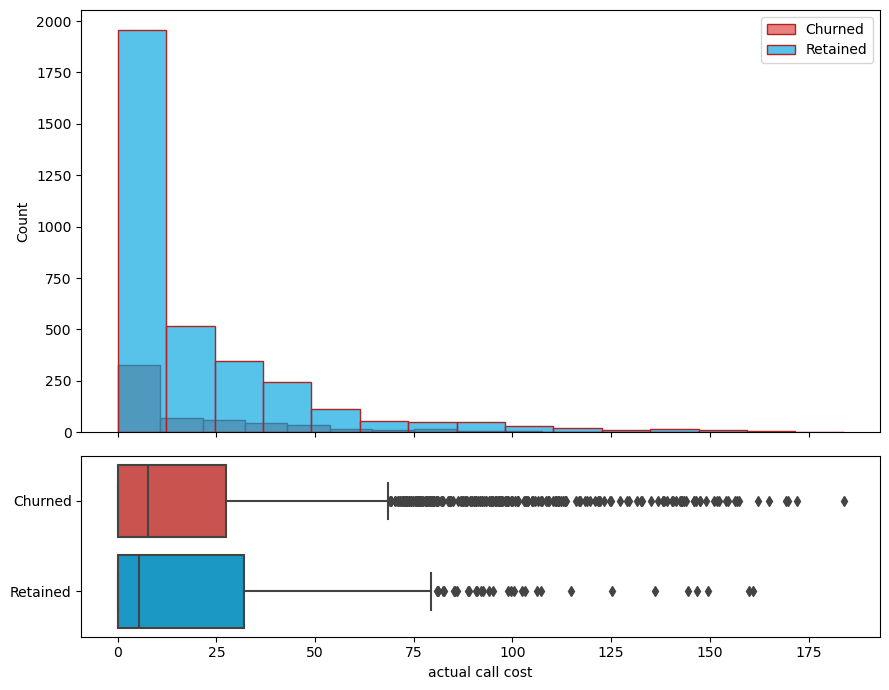

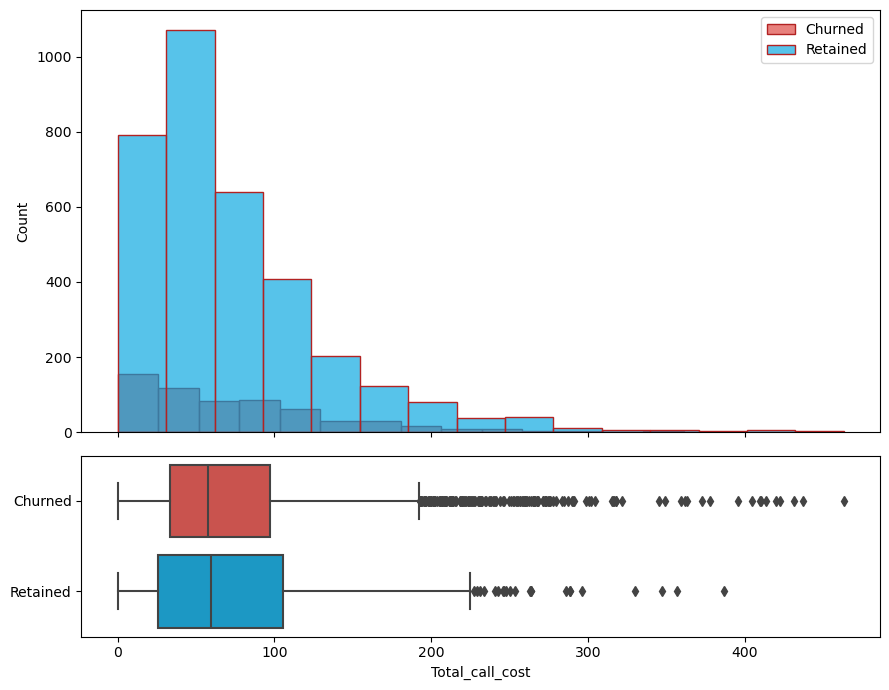

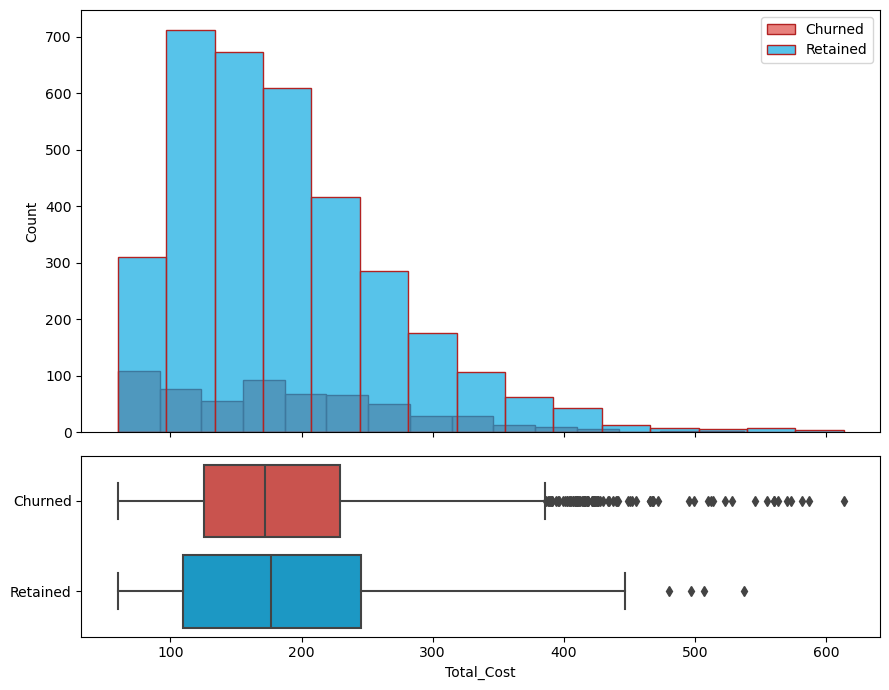

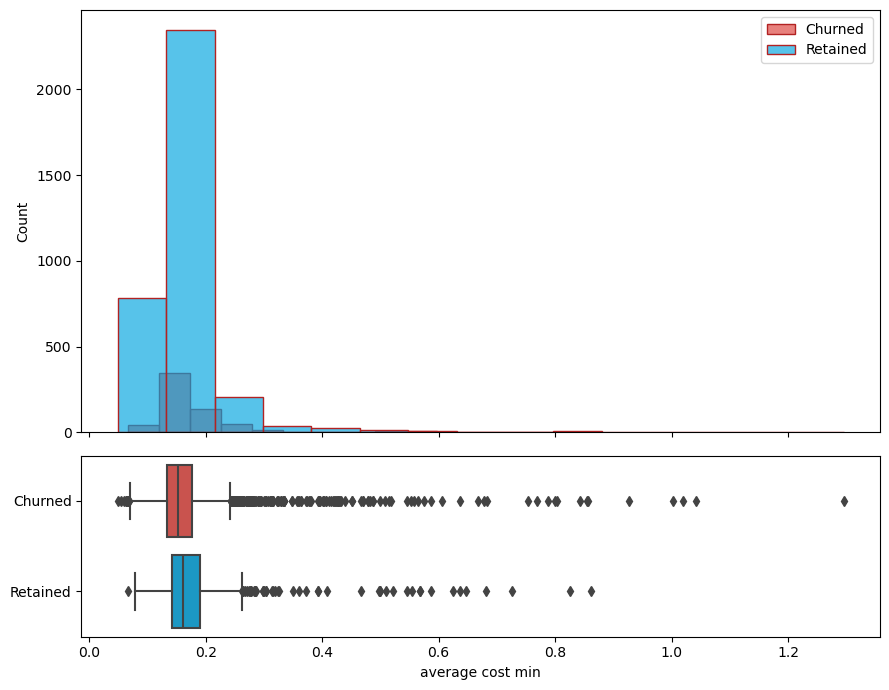

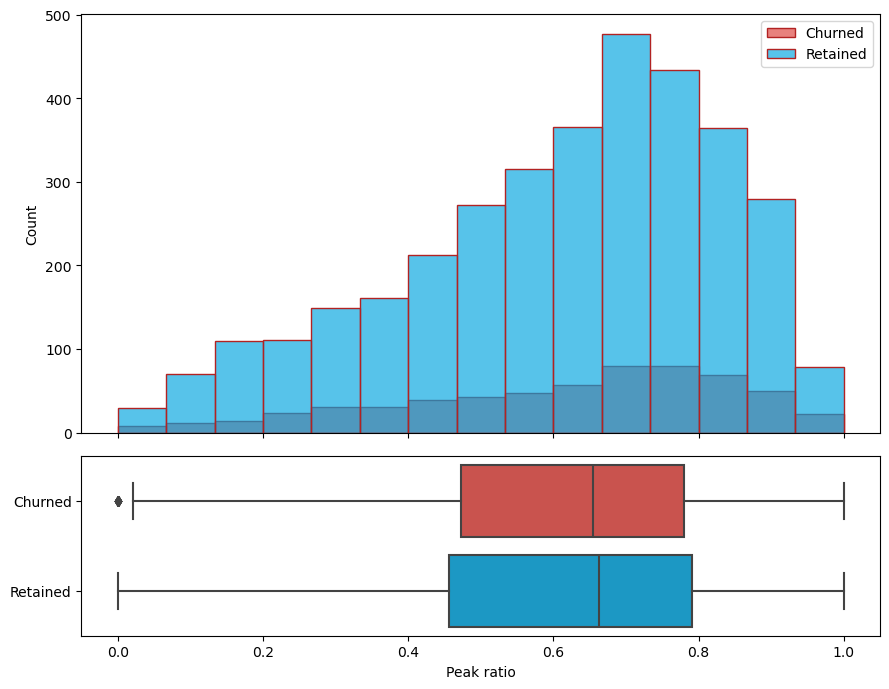

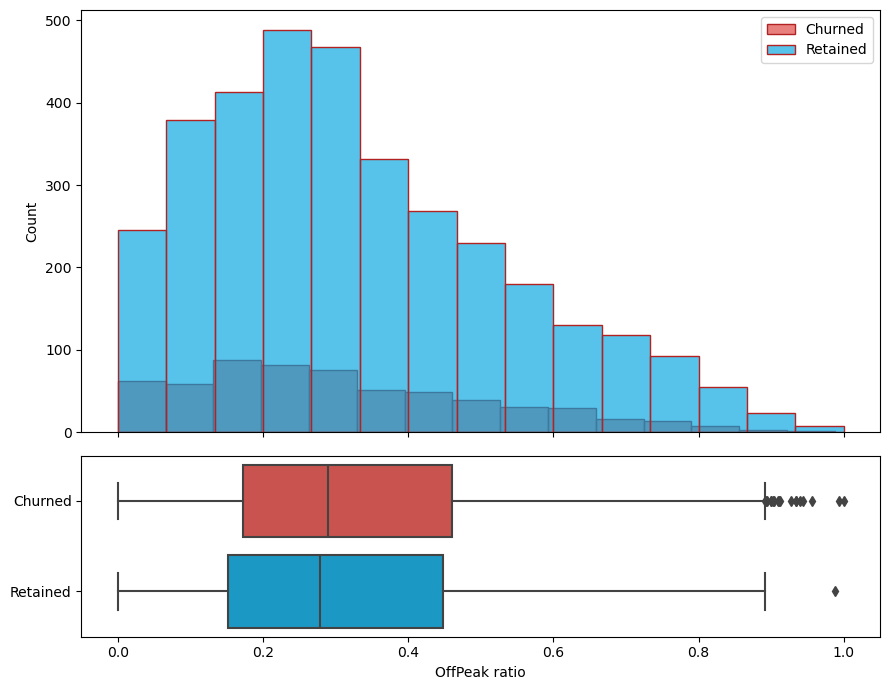

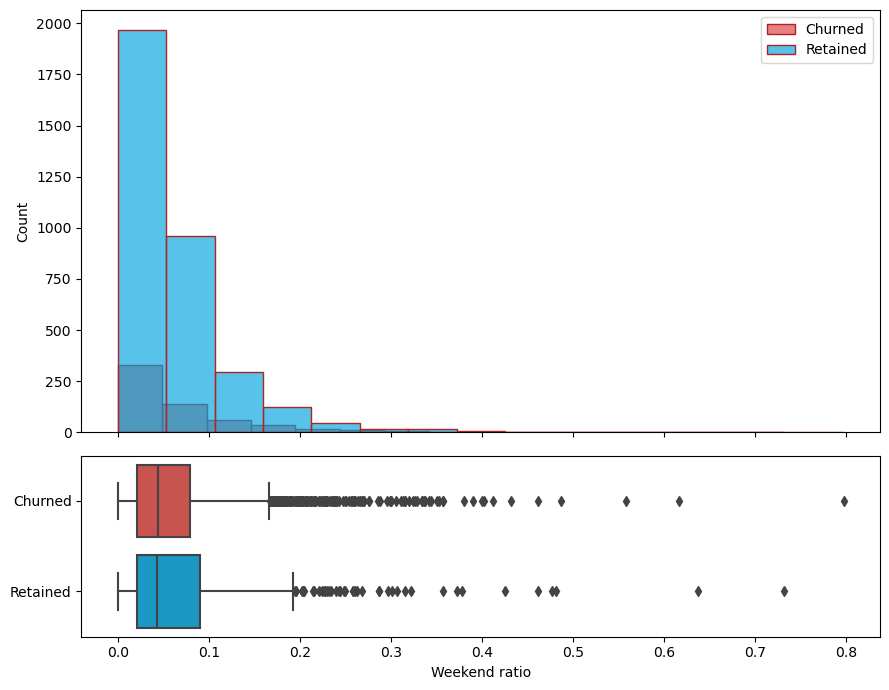

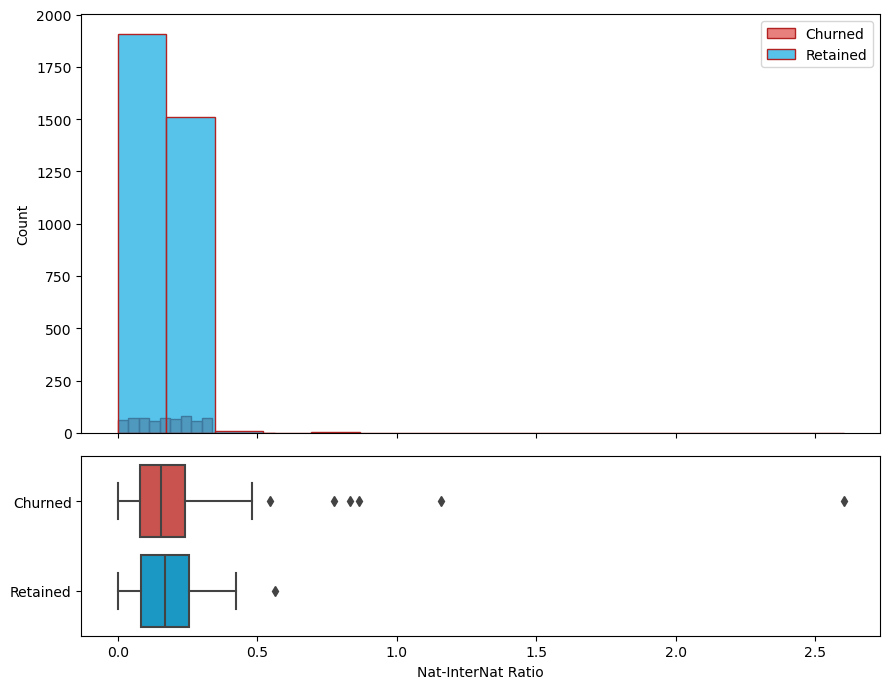

In [250]:
for feature in continuous:
    plot_continuous(feature)

<h4> Correlations</h4>

<Axes: >

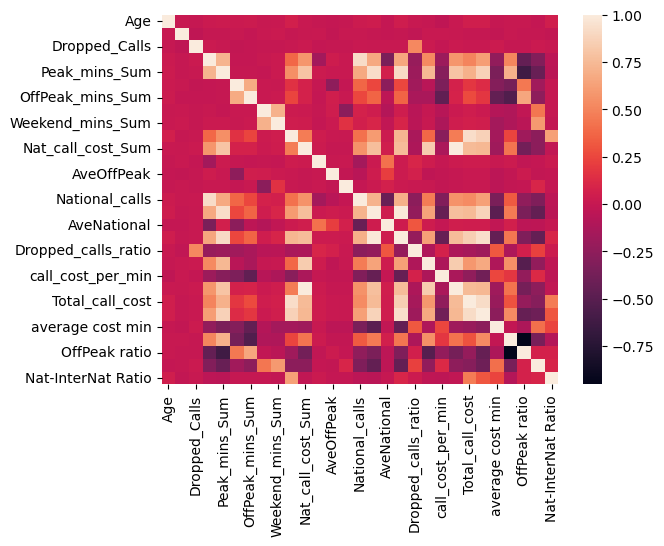

In [182]:
sns.heatmap(train_set[continuous].corr())

In [243]:
high_cors = train_set[continuous].corr().abs().unstack().sort_values(ascending=False).drop_duplicates()
print(high_cors[high_cors>=0.75])

Age                     Age                       1.000000
actual call cost        Nat_call_cost_Sum         0.998936
National mins           All_calls_mins            0.983474
OffPeak ratio           Peak ratio                0.952965
All_calls_mins          Total_Cost                0.936637
Peak_mins_Sum           National mins             0.927640
Total_call_cost         International_mins_Sum    0.926150
Peak_calls_Sum          National_calls            0.923240
Total_call_cost         Total_Cost                0.921903
Peak_mins_Sum           All_calls_mins            0.910392
National mins           Total_Cost                0.873839
Total_Cost              Peak_mins_Sum             0.868867
International_mins_Sum  Total_Cost                0.863910
All_calls_mins          Total_call_cost           0.848086
Mins_charge             Nat_call_cost_Sum         0.837308
actual call cost        Mins_charge               0.836811
Peak_mins_Sum           Nat_call_cost_Sum         0.7981

<h4> There are many highly correlated variables.. I am not sure how this affects our model

<h4> Categorical Variables

In [253]:
null_data = train_set[train_set.isnull().any(axis=1)]